<a href="https://colab.research.google.com/github/vatspratapsingh/Parkinson-s-Disease-Prediction-using-Predictive-SVM-Model/blob/main/parkinsons_Disease_detection_Using_GOOGLE_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
df=pd.read_csv('/content/parkinsons dataset 2.csv')
print(df.shape,'\n')
df.head()# Hyperparameter Optimization for Logistic Regression Algorithms

(5875, 16) 



,status,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ1,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
'''
To use columns of  df more efficiently following are some changes I have done
    a. pushing target column i.e 'status' to last column
    b. converting all column names in lower case
    c. replacing spaces in column names with '_'
    d. replacing ':' in column names with '_'
    e. replacing '(' in column names with '_'
    f. replacing ')' in column names with '' i.e blank
    g. replacing '%' in column names with 'in_percent'
'''

df = df.copy()        # creating a copy of loanDataOrg into loanData

targetCol = 'status'             # defining target column
targetColDf = df.pop(targetCol)   # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)     # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

# to check the above printing top 5 rows
df.head()

,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq1,shimmer_dda,nhr,hnr,rpde,dfa,ppe,status
0,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


In [ ]:
print(df.status)

0       0
1       0
2       0
3       0
4       0
       ..
5870    0
5871    0
5872    0
5873    0
5874    0
Name: status, Length: 5875, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   jitter_abs    5875 non-null   float64
 1   jitter_rap    5875 non-null   float64
 2   jitter_ppq5   5875 non-null   float64
 3   jitter_ddp    5875 non-null   float64
 4   shimmer       5875 non-null   float64
 5   shimmer_db    5875 non-null   float64
 6   shimmer_apq3  5875 non-null   float64
 7   shimmer_apq5  5875 non-null   float64
 8   shimmer_apq1  5875 non-null   float64
 9   shimmer_dda   5875 non-null   float64
 10  nhr           5875 non-null   float64
 11  hnr           5875 non-null   float64
 12  rpde          5875 non-null   float64
 13  dfa           5875 non-null   float64
 14  ppe           5875 non-null   float64
 15  status        5875 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 734.5 KB


In [ ]:
df.describe()

,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq1,shimmer_dda,nhr,hnr,rpde,dfa,ppe,status
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,0.317787
std,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,0.465656
min,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,0.000000
25%,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,0.000000
50%,0.000034,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,0.000000
75%,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,1.000000
max,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,1.000000


In [ ]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

jitter_abs      0
jitter_rap      0
jitter_ppq5     0
jitter_ddp      0
shimmer         0
shimmer_db      0
shimmer_apq3    0
shimmer_apq5    0
shimmer_apq1    0
shimmer_dda     0
nhr             0
hnr             0
rpde            0
dfa             0
ppe             0
status          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# checking skewness of the data
df.skew().sort_values(ascending=False)

jitter_ppq5     7.586205
jitter_rap      6.945438
jitter_ddp      6.945376
nhr             6.549123
shimmer_apq5    3.698061
shimmer_apq1    3.406958
shimmer         3.312793
jitter_abs      3.283043
shimmer_db      3.099221
shimmer_dda     3.097224
shimmer_apq3    3.097223
ppe             1.090819
status          0.782873
dfa             0.282078
rpde           -0.037434
hnr            -0.812057
dtype: float64

<ipython-input-12-6408c2d1f8b7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


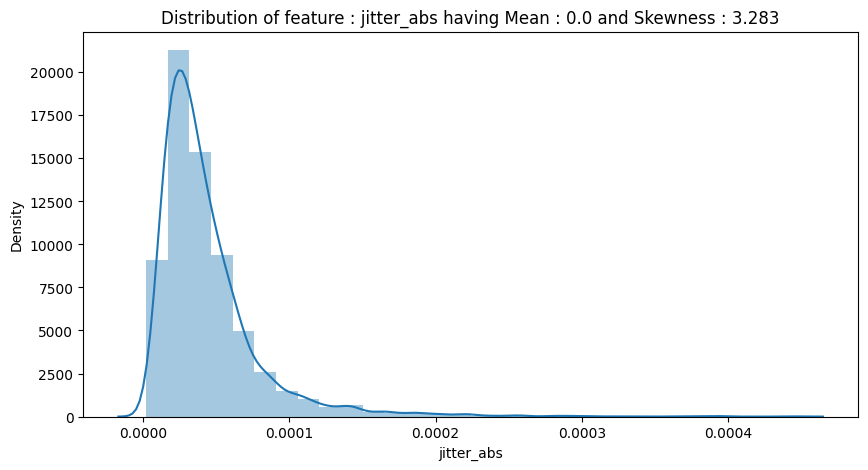

In [ ]:
feature = 'jitter_abs'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-13-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-13-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

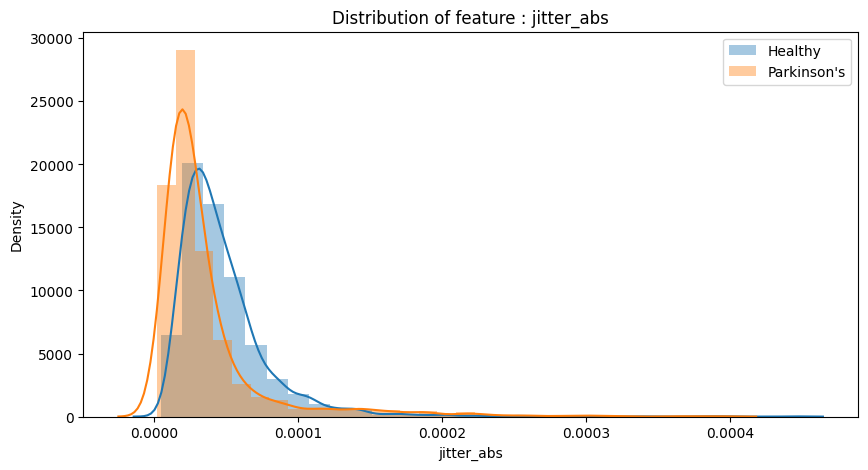

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

<ipython-input-14-f309446a3d74>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


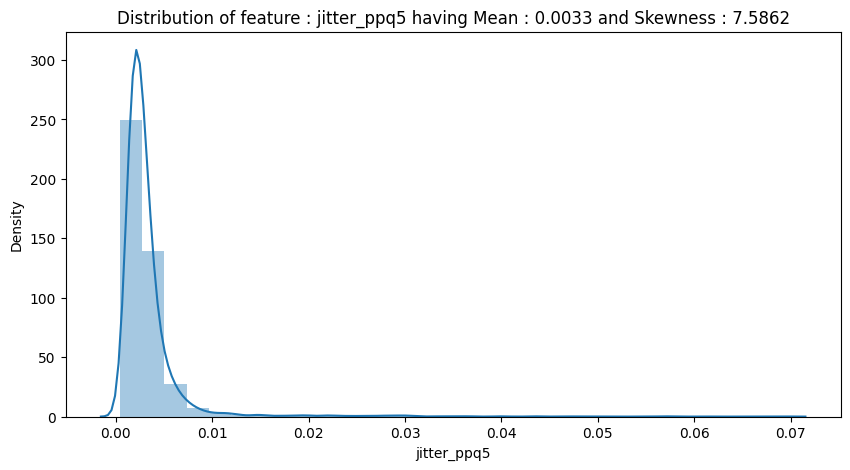

In [ ]:
feature = 'jitter_ppq5'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-15-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-15-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

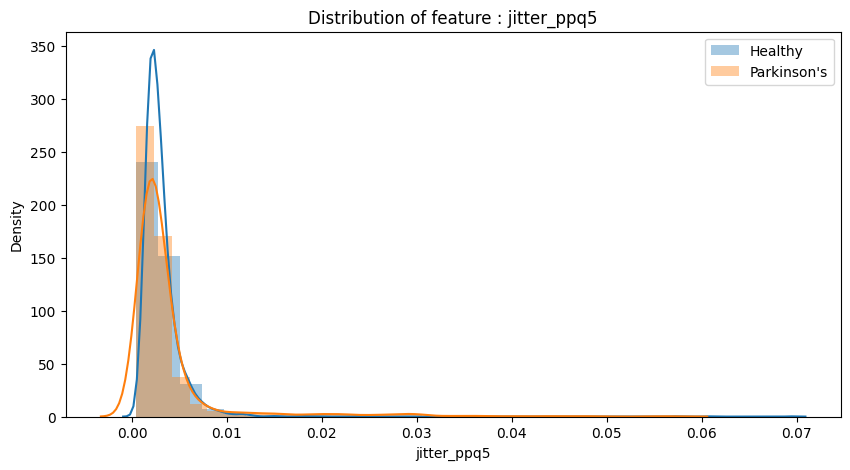

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

<ipython-input-16-2e3b6cc9580f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


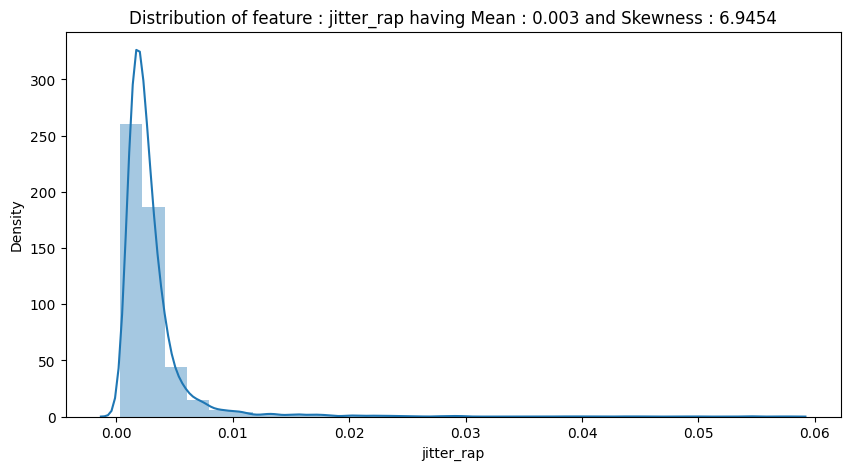

In [ ]:
feature = 'jitter_rap'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-17-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-17-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

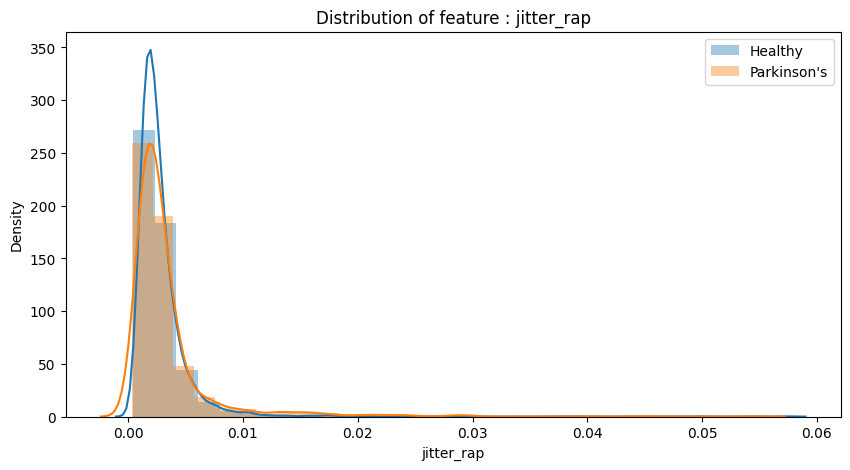

In [ ]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

In [ ]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df


status
0    4008
1    1867
Name: count, dtype: int64

In [ ]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

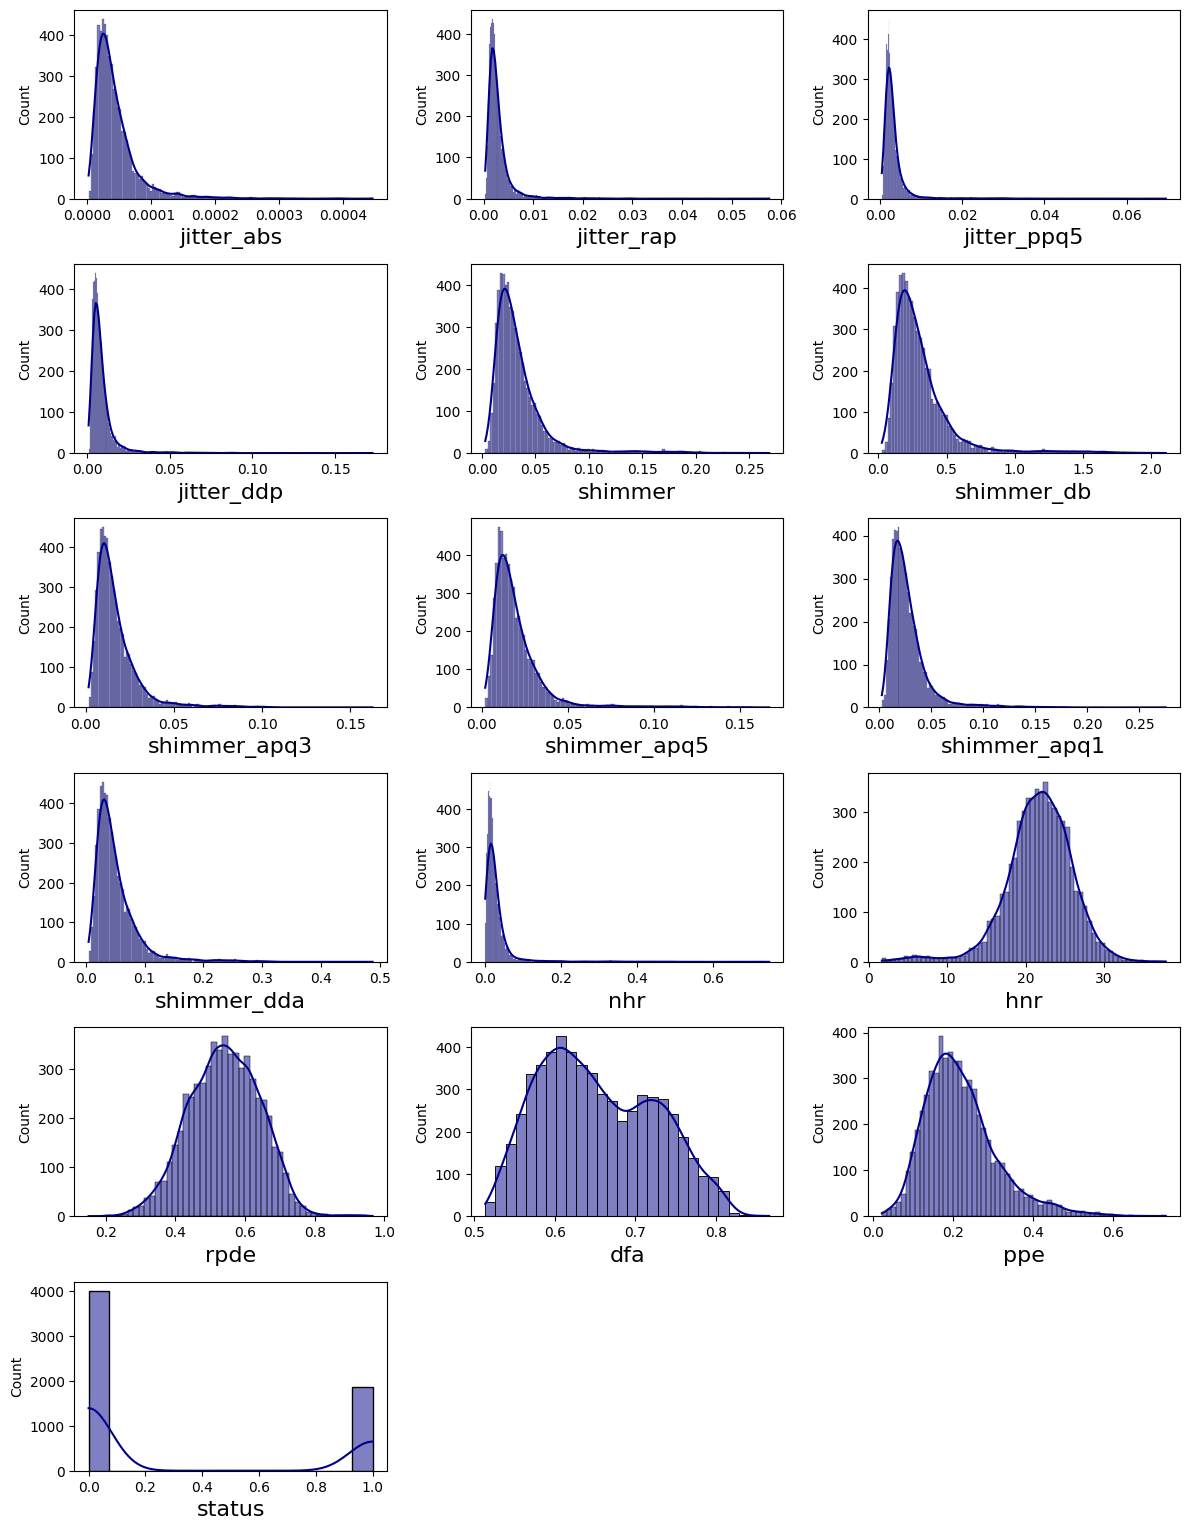

In [ ]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

<ipython-input-21-2ee848b74466>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)


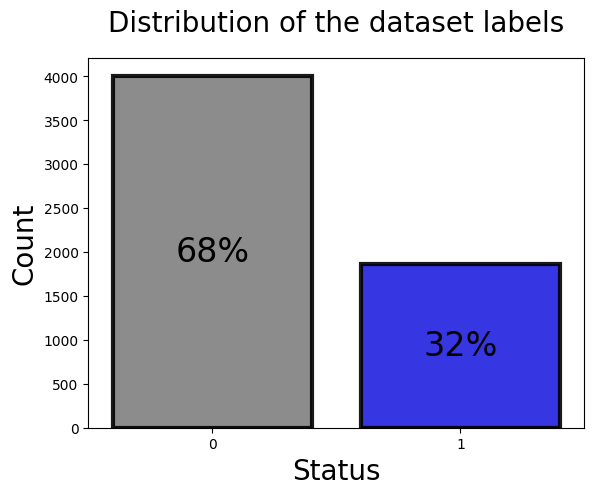

In [ ]:
fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20, fontfamily='Book Antiqua')
fig.set_ylabel('Count', fontsize=20, fontfamily='Book Antiqua')

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20, fontfamily='Book Antiqua')
plt.show()

In [ ]:
correlation = df.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

In [ ]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,shimmer_dda
status,0.044938
nhr,0.732734
jitter_ppq5,0.676710
jitter_rap,0.650225
jitter_ddp,0.650227
shimmer_apq5,0.962723
shimmer,0.979827
shimmer_db,0.968014
shimmer_dda,1.000000
shimmer_apq3,1.000000


<Axes: >

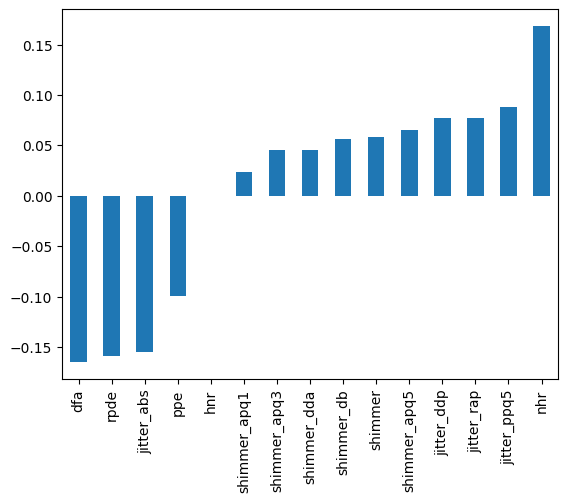

In [ ]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

In [ ]:
# Define the features (X) and the output labels (y)
X=df.drop(['status'],axis=1)
y=df["status"]

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [ ]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

SVM


--------------------------------------------------------------------------------
Support Vector Machine:
----------------



 • Training Accuracy Score :  71.09
 • Cross Validation Score : 70.98
 ❖ Testing Accuracy Score :  70.72
 • Precision Score is : 97.62
 • Recall Score is : 10.68
 • F1-Score Score is : 19.25
--------------------------------------------------------------------------------


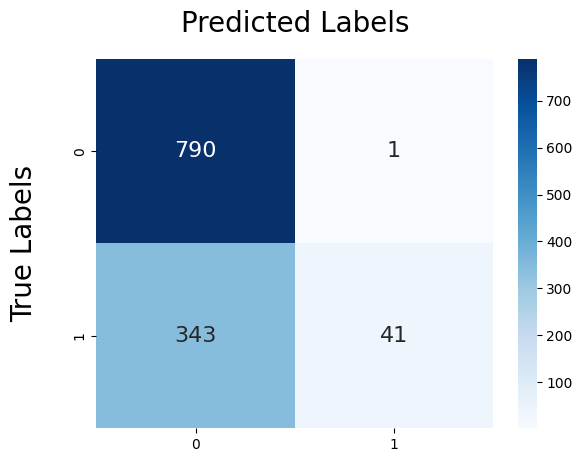

--------------------------------------------------------------------------------


In [ ]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

K Neighbors Classifier

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------



 • Training Accuracy Score :  89.26
 • Cross Validation Score : 83.0
 ❖ Testing Accuracy Score :  81.87
 • Precision Score is : 77.85
 • Recall Score is : 62.24
 • F1-Score Score is : 69.18
--------------------------------------------------------------------------------


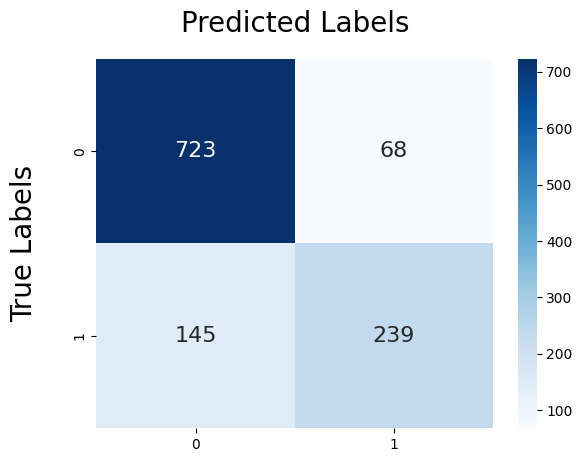

--------------------------------------------------------------------------------


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('K-Nearest Neighbor', y_pred_KNN)
]
results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })
    # Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: purple' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)

Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Support Vector Machine(linear),0.976190,0.106771,0.192488,0.707234
1,K-Nearest Neighbor,0.778502,0.622396,0.691751,0.818723


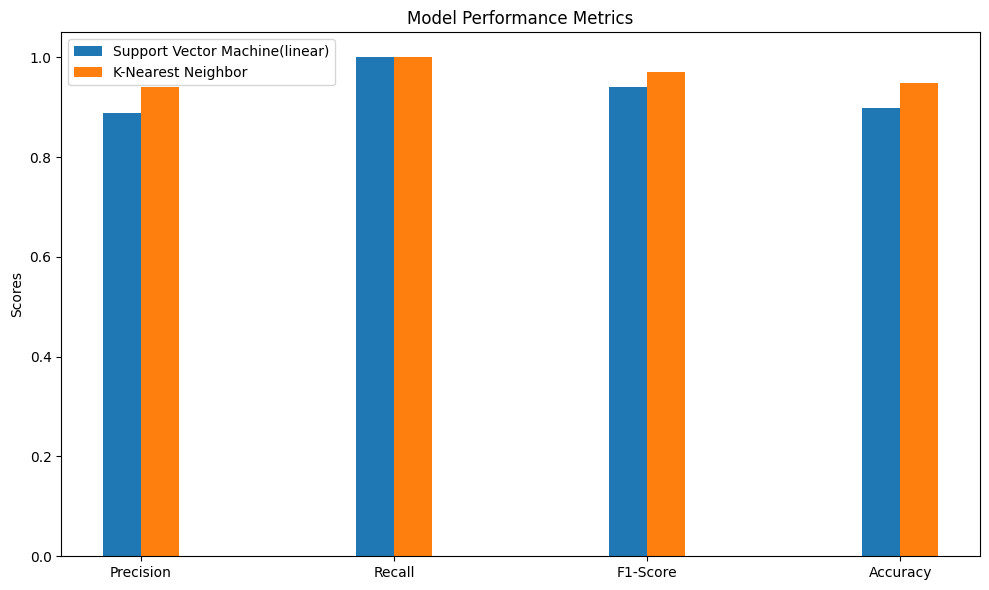

In [ ]:
# Your result data
data = [
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

# New Section

# New Section

In [ ]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
svm_predictions_test = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, svm_predictions_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       791
           1       0.92      0.06      0.12       384

    accuracy                           0.69      1175
   macro avg       0.80      0.53      0.47      1175
weighted avg       0.76      0.69      0.59      1175

Confusion Matrix:
[[789   2]
 [360  24]]


In [ ]:
# Standardize the input data
input_data = (2.91E-05,0.00152,0.00194,0.00457,0.02878,0.264,0.01379,0.01494,0.02309,0.04138,0.020181,22.203,0.51806,0.56978,0.17508)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)

print("Standardized Input Data:")
print(std_data)




Standardized Input Data:
[[-0.42305327 -0.48813405 -0.37185035 -0.48702987 -0.20102796 -0.20159374
  -0.25118608 -0.31062448 -0.218922   -0.25092709 -0.20004924  0.12325286
  -0.23569287 -1.17608682 -0.49006324]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Make prediction
prediction = svm_model.predict(std_data)
print("Predicted Class:", prediction[0])

if prediction[0] == 0:
    print("The Person does not have Parkinson's Disease")
else:
    print("The Person has Parkinson's Disease")

Predicted Class: 1
The Person has Parkinson's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
